In [2]:
# Necessary Imports
#import pdblp
import pandas as pd
import warnings
import os
# Suppress warnings
warnings.filterwarnings("ignore")
import os


# Price Data Pull
This jupyter notebook pulls a time series of price data for a specified time period and a list of tickers from Bloomberg and saves it to a csv

**NOTE: This section of the notebook will only work if you are logged into a Bloomberg terminal. If you are not logged into a Bloomberg terminal, skip this section and move on to the section on Data Analysis**

## Setting Parameters
In the next cell we set our parameters: Start Date, End Date, and Tickers

In [2]:
start_date = '20150101'
end_date = '20250519'
tickers = ['GSXUNPTC Index', 'ARKK US Equity', 'NDX Index', 'SPX Index', 'XAUBGN Curncy', 'USGGBE10 Index', 'USGG10YR Index', 
           'DXY Curncy', 'VIX Index']

## Pulling Data into Pandas DataFrame
We now pull price data for the specified tickers and time period into a Pandas DataFrame. For equity and indices, we use the field 'TOT_RETURN_INDEX_NET_DVDS' (RT117) which adjusts the price for corporate actions, dividends, etc. and for currencies we use the field 'PX_LAST' (PR005), as no adjustments are needed there.

In [15]:
from ltcm.data import bloomberg

#Fetch price data
price_df = bloomberg.get_bbg_price_index(tickers, start_date, end_date)
price_df

In [ ]:
FILE_PATH = os.path.join(os.path.dirname(os.getcwd()), 'flatfiles', 'ltcm_price_data.csv')
# Saving price data to disk

price_df.to_csv(FILE_PATH, header=True, index=True)

# Data Analysis
We now analyse the price data by computing a few summary statistics and visualizations

In [3]:
# Loading price data from desk
FILE_PATH = os.path.join(os.path.dirname(os.getcwd()), 'flatfiles', 'ltcm_price_data.csv')
price_df = pd.read_csv(FILE_PATH, header=0, index_col=0)
price_df.index = pd.to_datetime(price_df.index)
price_df

,GSXUNPTC Index,ARKK US Equity NDX Index,NDX Index,SPX Index,XAUBGN BGN Curncy,USGGBE10 Index,USGG10YR Index,DXY Curncy,VIX Index
date,,,,,,,,,
2015-01-01,93.74,NaN,NaN,NaN,1902.5692,1.6929,2.1712,90.276,NaN
2015-01-02,93.54,20.1700,4230.24,2058.20,1936.3042,1.7087,2.1105,91.080,17.79
2015-01-05,93.28,19.6844,4160.96,2020.58,1975.1792,1.6412,2.0320,91.378,19.92
2015-01-06,93.26,19.6100,4110.83,2002.61,2004.2113,1.5540,1.9402,91.499,21.12
2015-01-07,93.57,19.7000,4160.00,2025.90,2000.8223,1.5832,1.9677,91.890,19.31
...,...,...,...,...,...,...,...,...,...
2025-05-13,138.28,57.4100,21197.70,5886.55,5683.2441,2.3449,4.4650,101.003,18.22
2025-05-14,139.49,57.5600,21319.21,5892.58,5560.1660,2.3785,4.5363,101.039,18.62
2025-05-15,139.28,56.7300,21335.82,5916.93,5666.5625,2.3394,4.4315,100.879,17.83


## Index explanation




- **GSXUNPTC Index**: The Non-Profitable Technology Index, often referred to as the “negative earnings” company index. (Tracks the performance of technology companies that are primarily unprofitable.)  
- **ARKK US Equity**: The ticker for the ARK Innovation ETF, managed by ARK Invest. This ETF focuses on innovative and high-growth companies.  
- **NDX Index**: The Nasdaq-100 Index, which includes the 100 largest non-financial companies listed on the Nasdaq, primarily in technology and growth sectors.  
- **SPX Index**: The S&P 500 Index, tracking the performance of the 500 largest publicly traded companies in the U.S. by market capitalization. It serves as a key benchmark for the U.S. stock market.  
- **XAUBGN Curncy**: Represents the price of gold in terms of the Bulgarian Lev (BGN). This is a gold-to-currency exchange rate.  
- **USGGBE10 Index**: Reflects the 10-year breakeven inflation rate in the U.S. It’s calculated as the difference between the yields of nominal Treasury bonds and Treasury Inflation-Protected Securities (TIPS).  
- **USGG10YR Index**: The yield on the 10-year U.S. Treasury bond, a critical indicator of long-term interest rates and economic expectations.  
- **DXY Curncy**: The U.S. Dollar Index (DXY), which measures the strength of the U.S. dollar against a basket of major currencies (EUR, JPY, GBP, CAD, SEK, and CHF).  
- **VIX Index**: The Volatility Index, also known as the "fear index." It measures implied volatility in S&P 500 options and reflects market expectations for future volatility.  



## Time Series

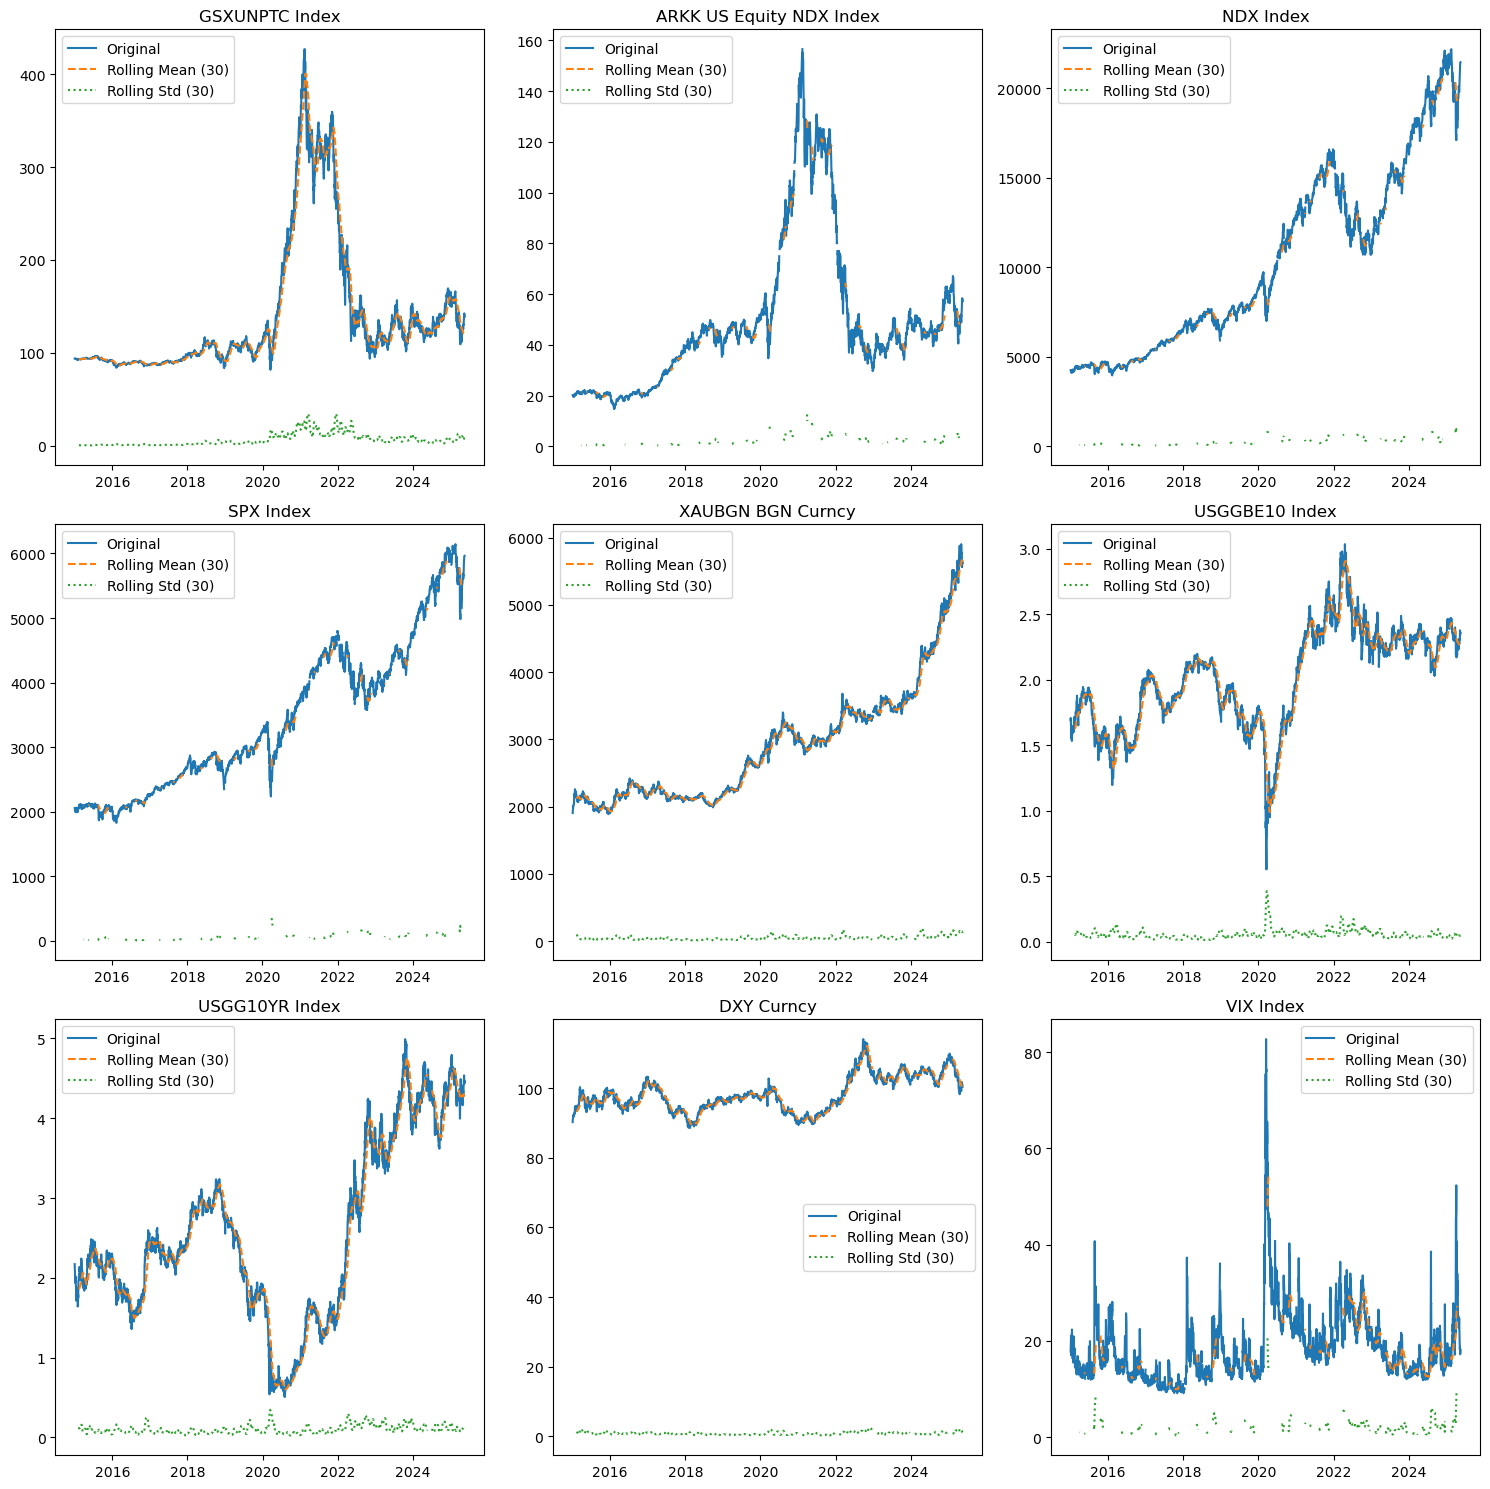

In [4]:
import matplotlib.pyplot as plt
rolling_mean = price_df.rolling(window=30).mean()
rolling_std = price_df.rolling(window=30).std()

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, column in enumerate(price_df.columns):
    ax[i // 3, i % 3].plot(price_df[column], label="Original")
    ax[i // 3, i % 3].plot(rolling_mean[column], label="Rolling Mean (30)", linestyle="--")
    ax[i // 3, i % 3].plot(rolling_std[column], label="Rolling Std (30)", linestyle=":")
    ax[i // 3, i % 3].set_title(column)
    ax[i // 3, i % 3].legend()
plt.tight_layout()
plt.show()


The analysis of the time series data reveals several key insights:

- **Time Series Data (Blue Line):** This line represents the actual performance of each index over time, illustrating their respective trends.

- **Rolling Mean (Orange Line):** Calculated with a 30-day window, the rolling mean smooths short-term fluctuations, highlighting the underlying trend of each index.

- **Rolling Standard Deviation (Green Line):** Also using a 30-day window, this metric measures the volatility of each index, indicating periods of higher or lower variability.

**Observations:**

- **Positive Trends:** Most indices exhibit an upward trajectory, reflecting growth over the observed period.

- **VIX Index:** Unlike the others, the VIX does not show a clear trend but demonstrates higher volatility, consistent with its role as a measure of market uncertainty.

- **Atypical Movements in 2020:** All indices display significant fluctuations during 2020, attributable to the global economic disruptions caused by the COVID-19 pandemic.
- **(USGG10YR):** During the onset of the COVID-19 pandemic in early 2020, the yield on the 10-year U.S. Treasury bond (USGG10YR) experienced a significant decline, reaching record lows. This drop was primarily due to investors seeking safe-haven assets amid escalating economic uncertainty, leading to increased demand for U.S. Treasury bonds

**Factors Contributing to Growth in Technology and Innovation Indices:**

1. **Accelerated Digital Transformation:** The pandemic pushed companies over the technology tipping point, transforming business operations and processes. ([McKinsey & Company](https://www.mckinsey.com/capabilities/strategy-and-corporate-finance/our-insights/the-impact-of-covid-19-on-capital-markets-one-year-in?utm_source=chatgpt.com))

2. **Increased Demand for Digital Solutions:** With social distancing measures in place, there was a surge in the use of digital platforms for communication, entertainment, and commerce. ([McKinsey & Company](https://www.mckinsey.com/capabilities/strategy-and-corporate-finance/our-insights/the-impact-of-covid-19-on-capital-markets-one-year-in?utm_source=chatgpt.com))

3. **Innovation in Response to New Challenges:** The pandemic sparked significant innovation, particularly in healthcare and technology sectors, as companies developed solutions to address emerging needs. ([McKinsey & Company](https://www.mckinsey.com/capabilities/strategy-and-corporate-finance/our-insights/the-impact-of-covid-19-on-capital-markets-one-year-in?utm_source=chatgpt.com))

. 

This analysis underscores how the pandemic influenced financial markets, particularly highlighting the resilience and growth of technology and innovation sectors during a period of global uncertainty. 

## Correlation

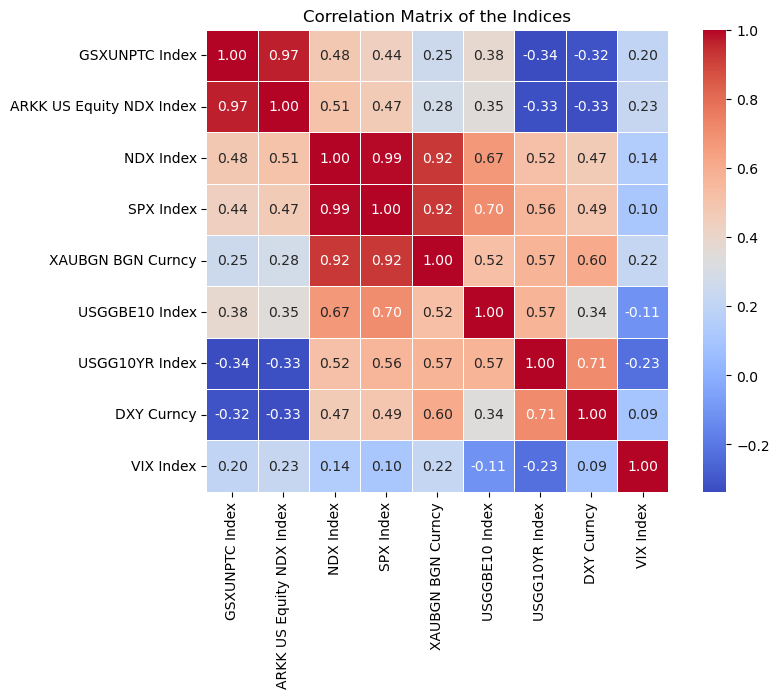

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = price_df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap="coolwarm",  
    fmt=".2f",  
    linewidths=0.5,  
    square=True  
)
plt.title("Correlation Matrix of the Indices")
plt.show()


In the plot above, we can observe the correlation between each pair of indices. The most relevant correlations are:

**High Positive Correlations**

- **SPX - NDX:** (+0.99) This strong correlation makes sense as both indices include several of the same large-cap companies, particularly in the technology sector. While the NDX is heavily weighted toward technology, the SPX, though more diversified, also has significant exposure to tech companies.

- **ARKK - GSXUNPTC:** (+0.97) The correlation reflects their shared focus on innovative technology companies, which often leads to similar performance trends.

- **SPX - XAUBGN Curncy:** (+0.92) The correlation between SPX and XAUBGN Curncy arises from their roles in financial markets. The S&P 500 reflects investor optimism and economic growth, while gold acts as a safe haven. In risk-on scenarios, both may rise due to liquidity and inflation expectations, whereas in risk-off environments, gold’s safe-haven appeal often contrasts with equity declines.

**Notable Negative Correlation**

- **USGG10YR Index - GSXUNPTC Index:** (-0.34) The negative correlation between the USGG10YR Index (10-year U.S. Treasury yield) and the GSXUNPTC Index (gold spot price) stems from their inverse relationship with interest rates. Higher yields make bonds more attractive, increasing the opportunity cost of holding gold, which doesn’t pay interest. Conversely, lower yields enhance gold’s appeal as a store of value, driving the negative correlation.

- **USGG10YR Index - ARKK US Equity NDX Index:** (-0.33)
The negative correlation indicates that as interest rates rise, growth-focused funds like ARKK tend to underperform. Higher yields increase the discount rates applied to future cash flows, negatively impacting valuations of high-growth, innovation-driven companies.

- **DXY Currency - GSXUNPTC Index:** (-0.32)
The negative relationship suggests that a stronger U.S. dollar typically creates headwinds for high-growth technology stocks included in GSXUNPTC. A strong dollar can reduce the international competitiveness of U.S. technology firms, negatively affecting their earnings and market performance.

## Normalized Volatilities

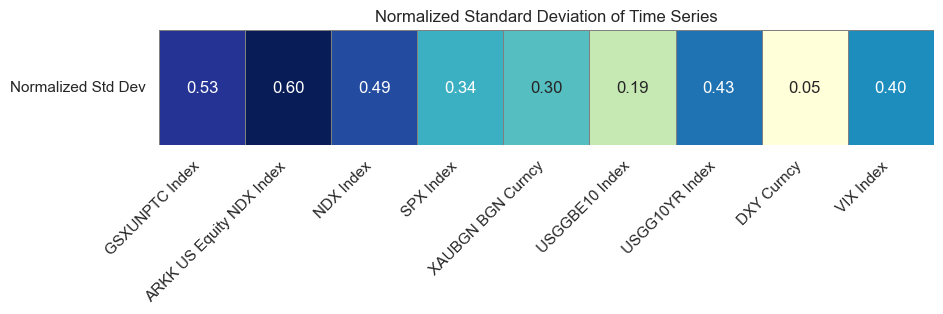

In [6]:
# Calculate mean and standard deviation
mean_values = price_df.mean()
std_dev = price_df.std()

# Normalize standard deviation by the mean of each series
normalized_std_dev = std_dev / mean_values
normalized_std_dev_df = pd.DataFrame(normalized_std_dev, columns=['Normalized Std Dev'])

# Plot the normalized standard deviation
sns.set(style="whitegrid")
plt.figure(figsize=(10, 1.5))

heatmap = sns.heatmap(
    normalized_std_dev_df.T,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Normalized Standard Deviation of Time Series')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



As we can see, the most volatile indices are **ARKK** and **GSXUNPTC**, which could be due to their exposure to highly dynamic sectors and market conditions. For instance, ARKK focuses on innovative and disruptive technology companies, which tend to have higher price fluctuations. Similarly, GSXUNPTC (Goldman Sachs Non-Profitable Technology Index) tracks non-profitable technology firms whose valuations are highly sensitive to changes in market sentiment, interest rates, and economic outlook, leading to significant volatility.

On the other hand, **DXY** (U.S. Dollar Index) is the series with the lowest volatility. This is likely because it reflects the relative stability of the U.S. dollar compared to other major currencies, which generally exhibit smaller daily price movements due to the high liquidity and maturity of currency markets.

This knowledge could be useful for risk management and portfolio construction. Understanding which assets or indices are more volatile can help investors allocate capital more effectively, hedge risks, and align their investments with their risk tolerance and objectives.
